# Quality Control of Whole Genome Sequencing

## Helper function

In [49]:
import os
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

# Ignore FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Suppress the UserWarning related to 'palette' and other warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Function to flatten the JSON and keep only leaf nodes
def flatten_json(json_obj, prefix=''):
    flat_data = {}
    for key, value in json_obj.items():
        # Check if value is a dictionary (i.e., nested) or if it's a leaf node
        if isinstance(value, dict):
            flat_data.update(flatten_json(value))  # Recursively flatten nested dictionaries
        else:
            flat_data[key] = value  # Leaf node, add to flat_data
    return flat_data

# Function to load the JSON in a DataFrame
def load_metrics(directory):
    
    # Initialize an empty list to store the parsed JSON data
    data_list = []
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".metrics.json"):  # Only process .json files
            filepath = os.path.join(directory, filename)
            # Open and load each JSON file
            with open(filepath, 'r') as f:
                data = json.load(f)
                # Flatten the JSON and keep only leaf nodes
                flat_data = flatten_json(data)
                # Append to the data list
                data_list.append(flat_data)
    
    # Create a DataFrame from the list of flat data
    df = pd.DataFrame(data_list)
    # Append sample info
    return append_info(df)

## Append sample info
def append_info(df):
    df_info = pd.read_csv('../n.100-1kg-samples_info_igsr.csv')
    df_merged = df.merge(df_info, left_on='id', right_on='Sample_name')
    return df_merged

def scatter(df_A, df_B, col):
    # Create a scatter plot
    sns.scatterplot(data=df_A, x=col, y=df_B[col])

    # Calculate correlation coefficient
    corr = df_A[col].corr(df_B[col])
    plt.text(0.1, 0.9, f'Corr: {corr:.2f}', transform=plt.gca().transAxes)

    # Add diagonale line
    gmin = min(df_A[col].min(), df_B[col].min())
    gmax = max(df_A[col].max(), df_B[col].max())
    plt.plot([gmin, gmax], [gmin, gmax], color='red', linestyle='--')
    
    # Set plot title and labels
    plt.title(f'{col}')
    plt.xlabel(f'{A_label}')
    plt.ylabel(f'{B_label}')

    if col in formatter:
        plt.gca().xaxis.set_major_formatter(formatter[col])
        plt.gca().yaxis.set_major_formatter(formatter[col])

    if col in ylims:
        plt.xlim(ylims[col][0], ylims[col][1])
        plt.ylim(ylims[col][0], ylims[col][1])
    
    # Show the plot
    plt.show()

In [50]:
formatter = {
    'cross_contamination_rate': tkr.PercentFormatter(xmax=0.1),
    # 'yield_bp_q30': tkr.EngFormatter(),
    # 'count_deletions': tkr.EngFormatter(),
    # 'count_insertions': tkr.EngFormatter(),
    # 'count_snvs': tkr.EngFormatter(),
    
}
# Specify metrics ranges
ylims = {
    # 'cross_contamination_rate': [0, 0.1e-3]
}

## Compare NPM v0.12.0 vs ARGO v1.0.0

In [40]:
## Load metrics group A
A_label='NPM v0.12.0'
A_dir='../results-npm-sample-qc-v0.12.0'
df_A = load_metrics(A_dir)
df_A

,id,cross_contamination_rate,insert_size_std_deviation,mad_autosome_coverage,mean_autosome_coverage,mean_insert_size,pct_autosomes_15x,pct_reads_mapped,pct_reads_properly_paired,yield_bp_q30,Sample_name,Sex,Biosample_ID,Population_code,Population_name,Superpopulation_code,Superpopulation_name,Population_elastic_ID,Data_collections
0,NA20298,1.879880e-06,100.7,5.0,32.29914,445.6,95.9107,99.70689,97.85116,109403663177,NA20298,male,SAME124382,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA20317,4.049210e-09,101.0,4.0,30.71611,443.5,95.8931,99.71659,97.84460,105461703830,NA20317,female,SAME123943,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA20342,2.665030e-09,99.9,5.0,31.30704,439.7,95.9617,99.74522,97.79328,109449901862,NA20342,male,SAME124398,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA21133,3.397340e-09,104.0,5.0,41.01108,451.8,96.3587,99.70977,98.06093,138827812751,NA21133,male,SAME123831,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA21126,1.603350e-10,95.0,4.0,29.75168,418.2,95.8063,99.52558,97.59924,102865521454,NA21126,male,SAME124026,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NA21112,1.952810e-06,100.9,5.0,32.38335,437.2,96.0309,99.71645,97.81641,109002390109,NA21112,male,SAME124182,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
96,NA21115,1.562780e-06,101.0,5.0,37.29407,440.2,96.2274,99.74695,98.07409,125097444900,NA21115,male,SAME124183,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
97,NA21100,1.254850e-09,98.0,4.0,29.21510,422.8,95.6652,99.52316,97.58877,96776159556,NA21100,male,SAME124440,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
98,NA21088,5.514270e-06,99.7,5.0,33.24734,434.0,96.0308,99.72714,98.20101,110451940888,NA21088,female,SAME123143,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [41]:
## Load metrics group B
B_label='ARGO v1.0.0'
B_dir='../results-argo-dnaalnqc-v1.0.0'
df_B = load_metrics(B_dir)
df_B

,id,yield_bp_q30,mean_autosome_coverage,pct_autosomes_15x,mad_autosome_coverage,pct_reads_mapped,pct_reads_properly_paired,mean_insert_size,insert_size_std_deviation,cross_contamination_rate,Sample_name,Sex,Biosample_ID,Population_code,Population_name,Superpopulation_code,Superpopulation_name,Population_elastic_ID,Data_collections
0,NA20298,1.094037e+11,32.29913,95.9107,5.0,99.70689,97.85116,445.6,100.7,0.0,NA20298,male,SAME124382,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA20317,1.054617e+11,30.71611,95.8931,4.0,99.71659,97.84460,443.5,101.0,0.0,NA20317,female,SAME123943,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA20342,1.094499e+11,31.30704,95.9617,5.0,99.74522,97.79328,439.7,99.9,0.0,NA20342,male,SAME124398,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA21133,1.388278e+11,41.01108,96.3587,5.0,99.70977,98.06093,451.8,104.0,0.0,NA21133,male,SAME123831,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA21126,1.028655e+11,29.75168,95.8063,4.0,99.52558,97.59924,418.2,95.0,0.0,NA21126,male,SAME124026,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NA21112,1.090024e+11,32.38335,96.0309,5.0,99.71645,97.81641,437.2,100.9,0.0,NA21112,male,SAME124182,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
96,NA21115,1.250974e+11,37.29407,96.2274,5.0,99.74695,98.07409,440.2,101.0,0.0,NA21115,male,SAME124183,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
97,NA21100,9.677616e+10,29.21510,95.6652,4.0,99.52316,97.58877,422.8,98.0,0.0,NA21100,male,SAME124440,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
98,NA21088,1.104519e+11,33.24734,96.0308,5.0,99.72714,98.20101,434.0,99.7,0.0,NA21088,female,SAME123143,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


/opt/homebrew/Caskroom/miniconda/base/envs/wgsqc/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/Caskroom/miniconda/base/envs/wgsqc/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


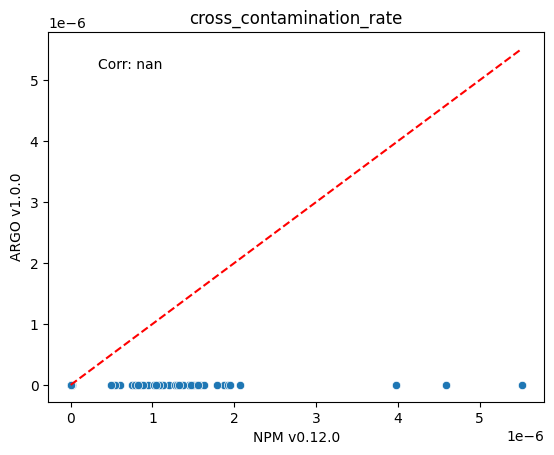

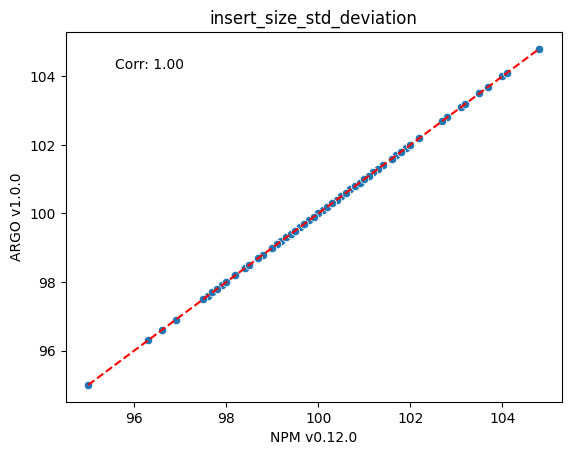

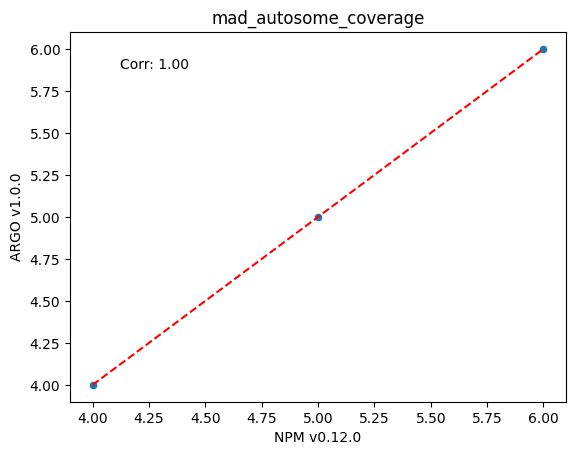

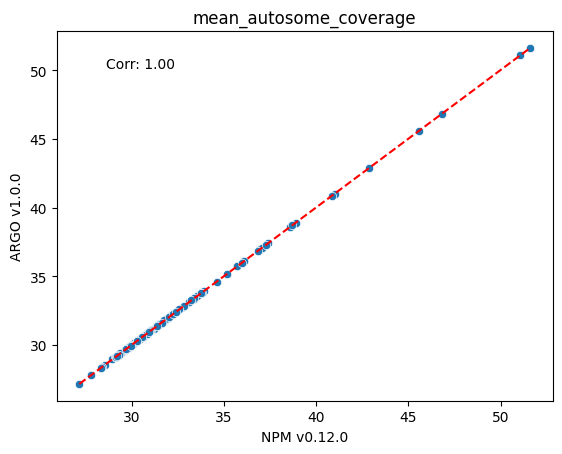

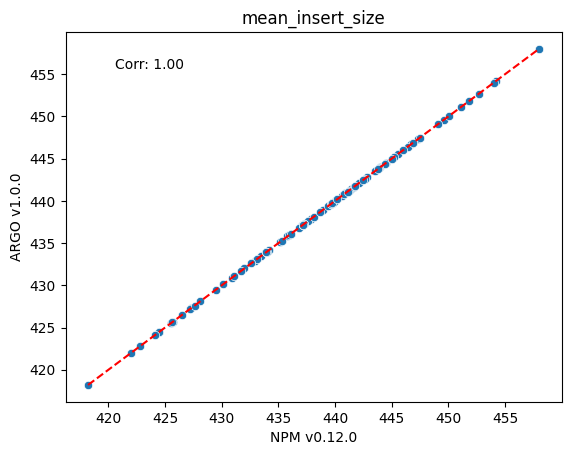

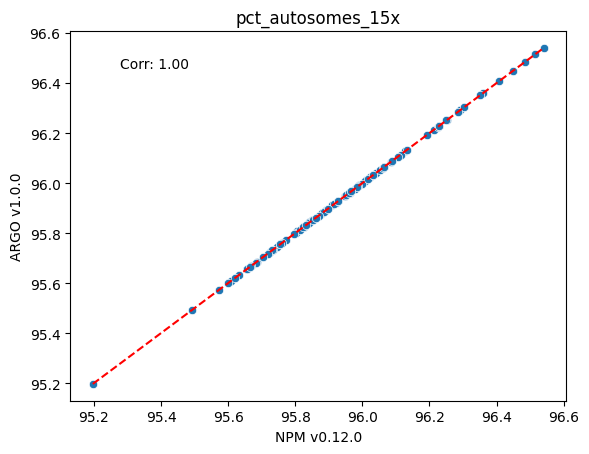

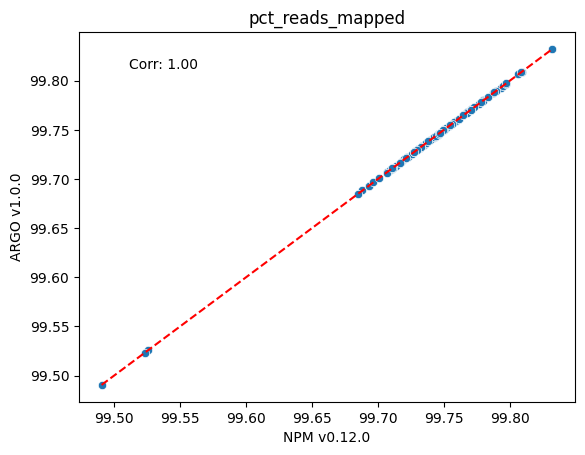

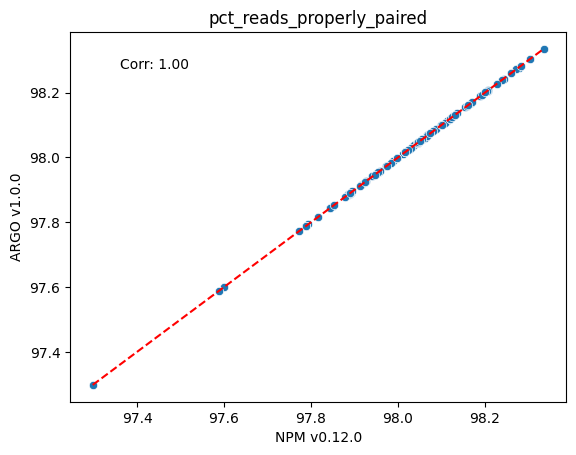

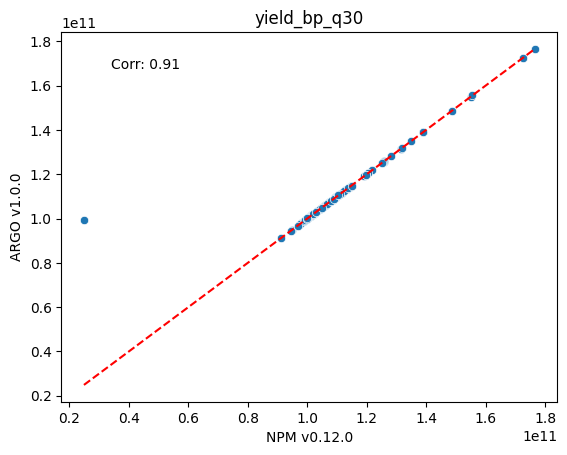

In [42]:
# Plot correlation for each metric
for col in df_A.columns[1:10]:
    scatter(df_A, df_B, col)

## Compare NPM v0.12.0 vs NPM v0.13.0

In [43]:
## Load metrics group A
A_label='NPM v0.12.0'
A_dir='../results-npm-sample-qc-v0.12.0'
df_A = load_metrics(A_dir)
df_A

,id,cross_contamination_rate,insert_size_std_deviation,mad_autosome_coverage,mean_autosome_coverage,mean_insert_size,pct_autosomes_15x,pct_reads_mapped,pct_reads_properly_paired,yield_bp_q30,Sample_name,Sex,Biosample_ID,Population_code,Population_name,Superpopulation_code,Superpopulation_name,Population_elastic_ID,Data_collections
0,NA20298,1.879880e-06,100.7,5.0,32.29914,445.6,95.9107,99.70689,97.85116,109403663177,NA20298,male,SAME124382,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA20317,4.049210e-09,101.0,4.0,30.71611,443.5,95.8931,99.71659,97.84460,105461703830,NA20317,female,SAME123943,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA20342,2.665030e-09,99.9,5.0,31.30704,439.7,95.9617,99.74522,97.79328,109449901862,NA20342,male,SAME124398,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA21133,3.397340e-09,104.0,5.0,41.01108,451.8,96.3587,99.70977,98.06093,138827812751,NA21133,male,SAME123831,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA21126,1.603350e-10,95.0,4.0,29.75168,418.2,95.8063,99.52558,97.59924,102865521454,NA21126,male,SAME124026,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NA21112,1.952810e-06,100.9,5.0,32.38335,437.2,96.0309,99.71645,97.81641,109002390109,NA21112,male,SAME124182,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
96,NA21115,1.562780e-06,101.0,5.0,37.29407,440.2,96.2274,99.74695,98.07409,125097444900,NA21115,male,SAME124183,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
97,NA21100,1.254850e-09,98.0,4.0,29.21510,422.8,95.6652,99.52316,97.58877,96776159556,NA21100,male,SAME124440,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
98,NA21088,5.514270e-06,99.7,5.0,33.24734,434.0,96.0308,99.72714,98.20101,110451940888,NA21088,female,SAME123143,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [44]:
## Load metrics group B
B_label='NPM v0.13.0'
B_dir='../results-npm-sample-qc-v0.13.0'
df_B = load_metrics(B_dir)
df_B

,id,cross_contamination_rate,insert_size_std_deviation,mad_autosome_coverage,mean_autosome_coverage,mean_insert_size,pct_autosomes_15x,pct_reads_mapped,pct_reads_properly_paired,yield_bp_q30,...,ratio_transitions_transversions_snv,Sample_name,Sex,Biosample_ID,Population_code,Population_name,Superpopulation_code,Superpopulation_name,Population_elastic_ID,Data_collections
0,NA20298,1.879880e-06,100.7,5,32.30,445.6,95.91,99.71,97.9,109403663177,...,1.97,NA20298,male,SAME124382,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA20317,6.123190e-09,101.0,4,30.72,443.5,95.89,99.72,97.8,105461703830,...,1.97,NA20317,female,SAME123943,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA20342,2.665030e-09,99.9,5,31.31,439.7,95.96,99.75,97.8,109449901862,...,1.97,NA20342,male,SAME124398,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA21133,3.397340e-09,104.0,5,41.01,451.8,96.36,99.71,98.1,138827812751,...,1.95,NA21133,male,SAME123831,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA21126,8.025660e-10,95.0,4,29.75,418.2,95.81,99.53,97.6,102865521454,...,1.96,NA21126,male,SAME124026,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NA21112,1.952810e-06,100.9,5,32.38,437.2,96.03,99.72,97.8,109002390109,...,1.96,NA21112,male,SAME124182,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
96,NA21115,1.562780e-06,101.0,5,37.29,440.2,96.23,99.75,98.1,125097444900,...,1.96,NA21115,male,SAME124183,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
97,NA21100,1.254850e-09,98.0,4,29.22,422.8,95.67,99.52,97.6,96776159556,...,1.96,NA21100,male,SAME124440,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
98,NA21088,5.514270e-06,99.7,5,33.25,434.0,96.03,99.73,98.2,110451940888,...,1.96,NA21088,female,SAME123143,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


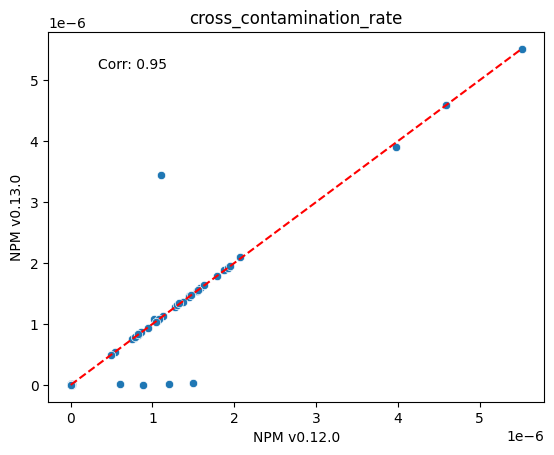

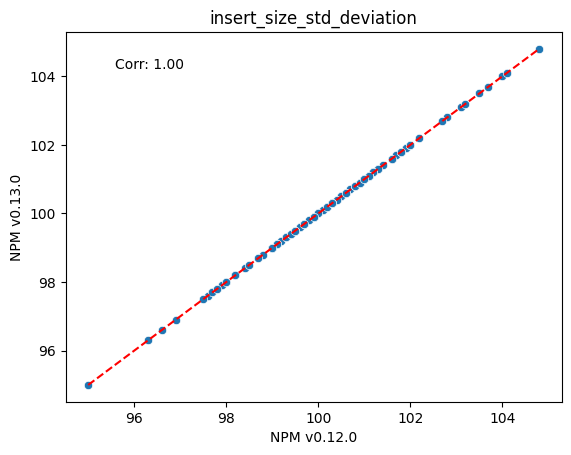

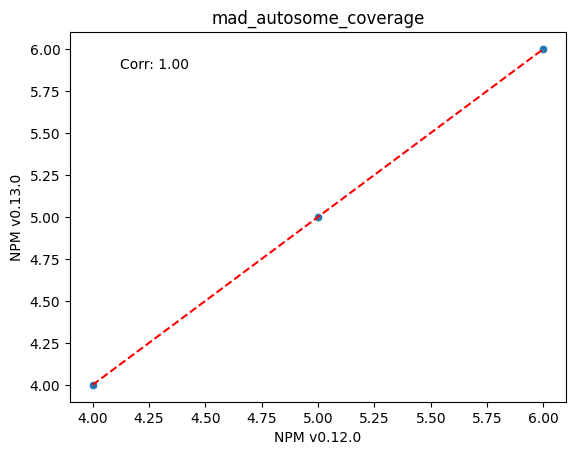

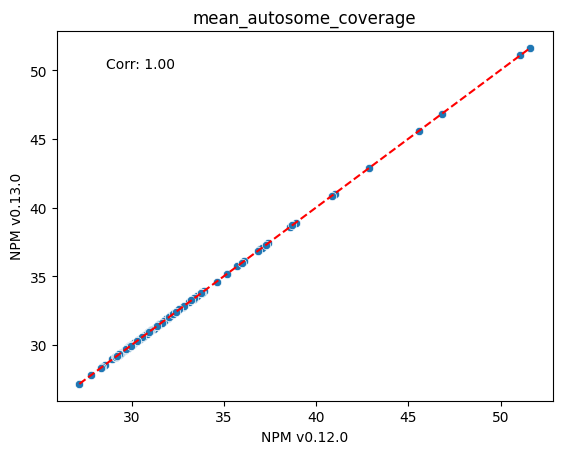

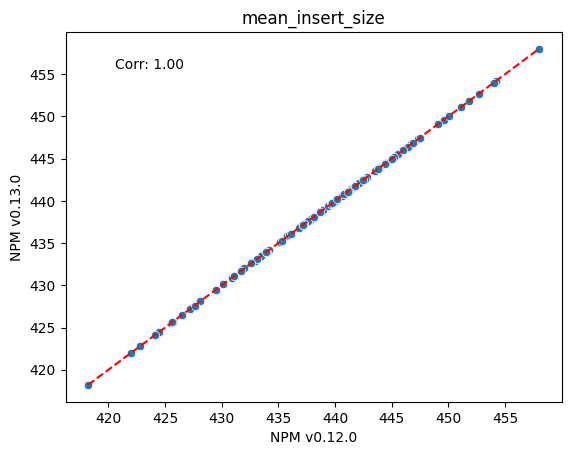

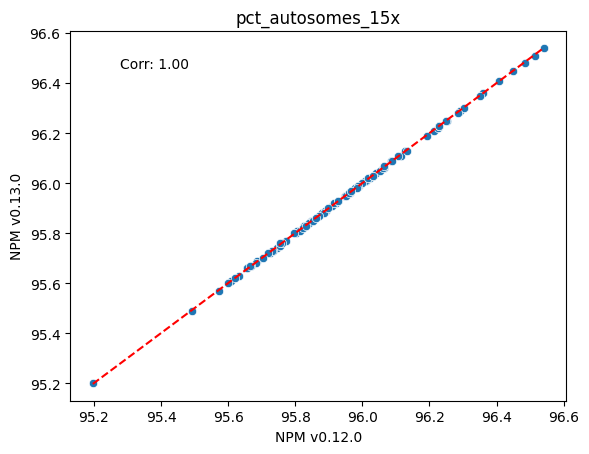

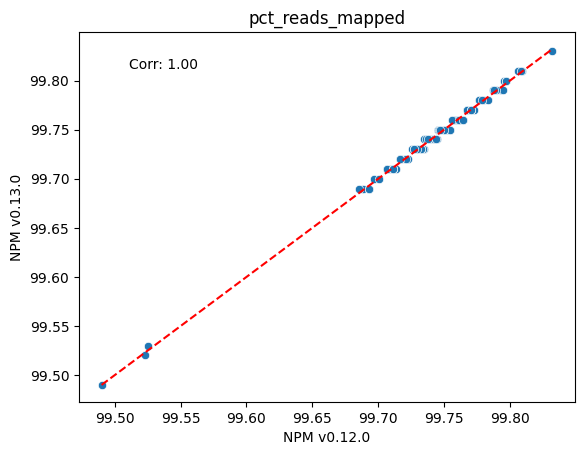

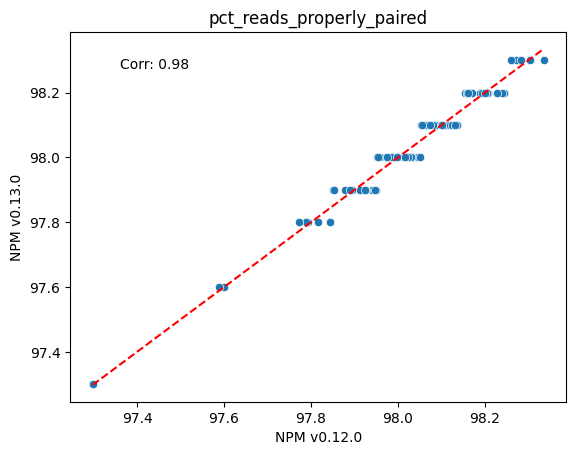

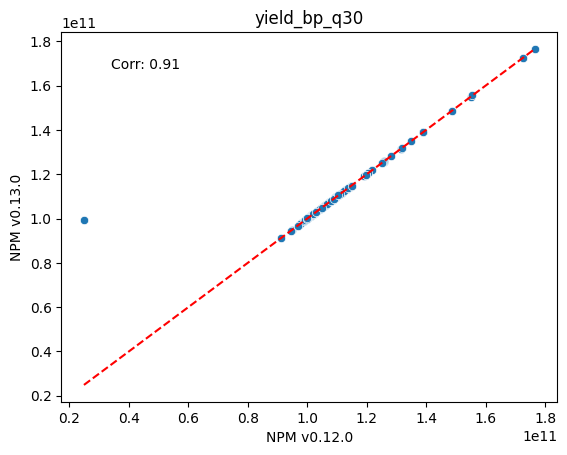

In [45]:
# Plot correlation for each metric
for col in df_A.columns[1:10]:
    scatter(df_A, df_B, col)

## Compare NPM v0.13.0 vs ARGO v1.0.0

In [46]:
## Load metrics group A
A_label='NPM v0.13.0'
A_dir='../results-npm-sample-qc-v0.13.0'
df_A = load_metrics(A_dir)
df_A

,id,cross_contamination_rate,insert_size_std_deviation,mad_autosome_coverage,mean_autosome_coverage,mean_insert_size,pct_autosomes_15x,pct_reads_mapped,pct_reads_properly_paired,yield_bp_q30,...,ratio_transitions_transversions_snv,Sample_name,Sex,Biosample_ID,Population_code,Population_name,Superpopulation_code,Superpopulation_name,Population_elastic_ID,Data_collections
0,NA20298,1.879880e-06,100.7,5,32.30,445.6,95.91,99.71,97.9,109403663177,...,1.97,NA20298,male,SAME124382,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA20317,6.123190e-09,101.0,4,30.72,443.5,95.89,99.72,97.8,105461703830,...,1.97,NA20317,female,SAME123943,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA20342,2.665030e-09,99.9,5,31.31,439.7,95.96,99.75,97.8,109449901862,...,1.97,NA20342,male,SAME124398,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA21133,3.397340e-09,104.0,5,41.01,451.8,96.36,99.71,98.1,138827812751,...,1.95,NA21133,male,SAME123831,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA21126,8.025660e-10,95.0,4,29.75,418.2,95.81,99.53,97.6,102865521454,...,1.96,NA21126,male,SAME124026,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NA21112,1.952810e-06,100.9,5,32.38,437.2,96.03,99.72,97.8,109002390109,...,1.96,NA21112,male,SAME124182,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
96,NA21115,1.562780e-06,101.0,5,37.29,440.2,96.23,99.75,98.1,125097444900,...,1.96,NA21115,male,SAME124183,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
97,NA21100,1.254850e-09,98.0,4,29.22,422.8,95.67,99.52,97.6,96776159556,...,1.96,NA21100,male,SAME124440,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
98,NA21088,5.514270e-06,99.7,5,33.25,434.0,96.03,99.73,98.2,110451940888,...,1.96,NA21088,female,SAME123143,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [47]:
## Load metrics group B
B_label='ARGO v1.0.0'
B_dir='../results-argo-dnaalnqc-v1.0.0'
df_B = load_metrics(B_dir)
df_B

,id,yield_bp_q30,mean_autosome_coverage,pct_autosomes_15x,mad_autosome_coverage,pct_reads_mapped,pct_reads_properly_paired,mean_insert_size,insert_size_std_deviation,cross_contamination_rate,Sample_name,Sex,Biosample_ID,Population_code,Population_name,Superpopulation_code,Superpopulation_name,Population_elastic_ID,Data_collections
0,NA20298,1.094037e+11,32.29913,95.9107,5.0,99.70689,97.85116,445.6,100.7,0.0,NA20298,male,SAME124382,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA20317,1.054617e+11,30.71611,95.8931,4.0,99.71659,97.84460,443.5,101.0,0.0,NA20317,female,SAME123943,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA20342,1.094499e+11,31.30704,95.9617,5.0,99.74522,97.79328,439.7,99.9,0.0,NA20342,male,SAME124398,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA21133,1.388278e+11,41.01108,96.3587,5.0,99.70977,98.06093,451.8,104.0,0.0,NA21133,male,SAME123831,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA21126,1.028655e+11,29.75168,95.8063,4.0,99.52558,97.59924,418.2,95.0,0.0,NA21126,male,SAME124026,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NA21112,1.090024e+11,32.38335,96.0309,5.0,99.71645,97.81641,437.2,100.9,0.0,NA21112,male,SAME124182,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
96,NA21115,1.250974e+11,37.29407,96.2274,5.0,99.74695,98.07409,440.2,101.0,0.0,NA21115,male,SAME124183,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
97,NA21100,9.677616e+10,29.21510,95.6652,4.0,99.52316,97.58877,422.8,98.0,0.0,NA21100,male,SAME124440,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
98,NA21088,1.104519e+11,33.24734,96.0308,5.0,99.72714,98.20101,434.0,99.7,0.0,NA21088,female,SAME123143,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


/opt/homebrew/Caskroom/miniconda/base/envs/wgsqc/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/Caskroom/miniconda/base/envs/wgsqc/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


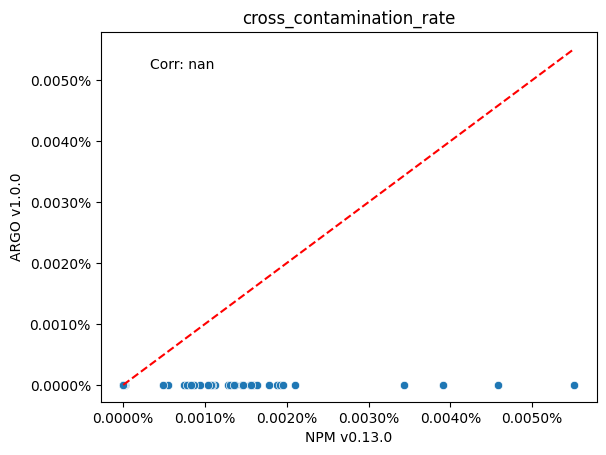

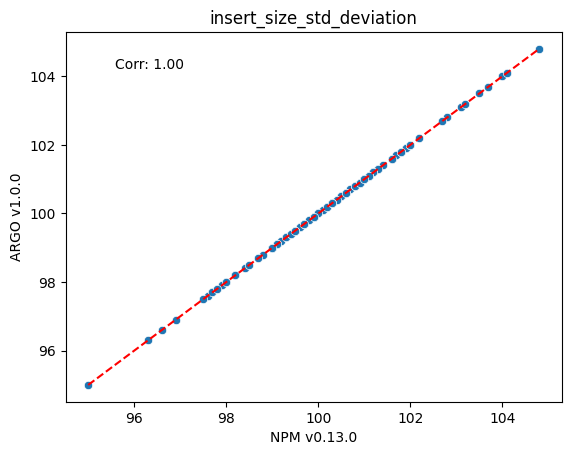

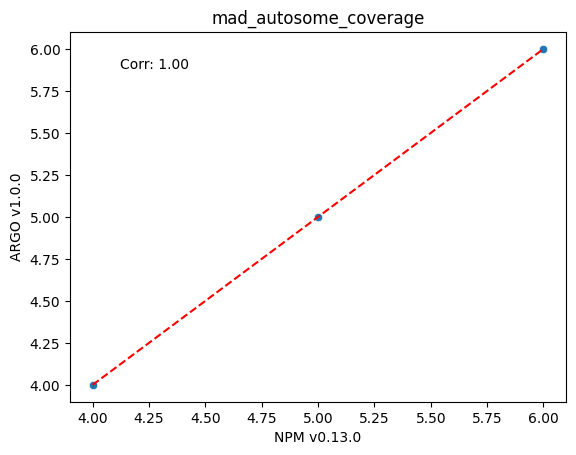

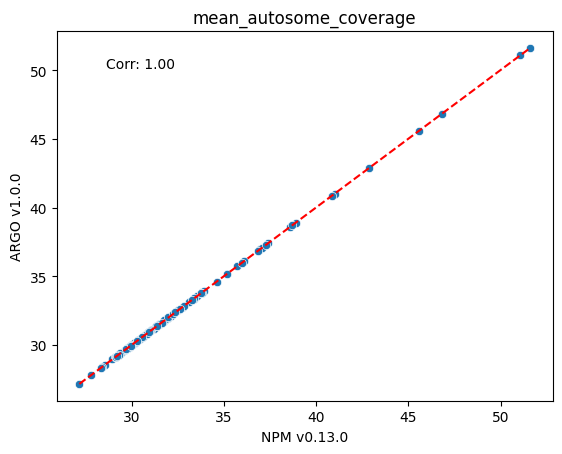

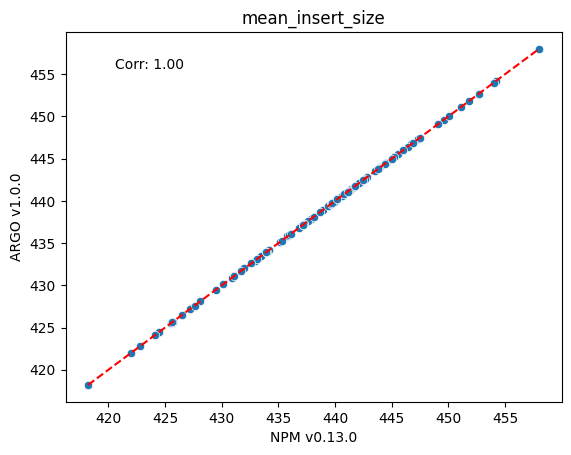

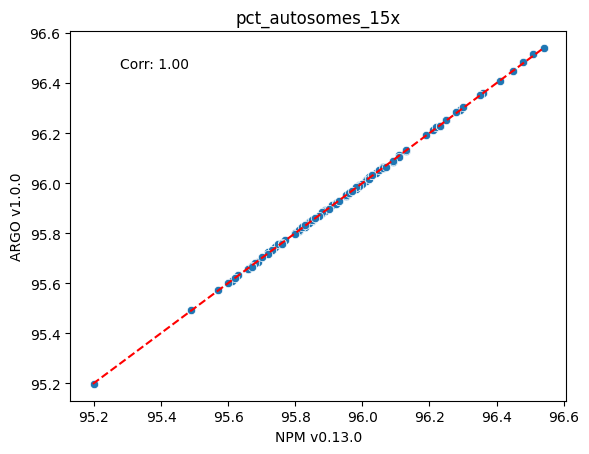

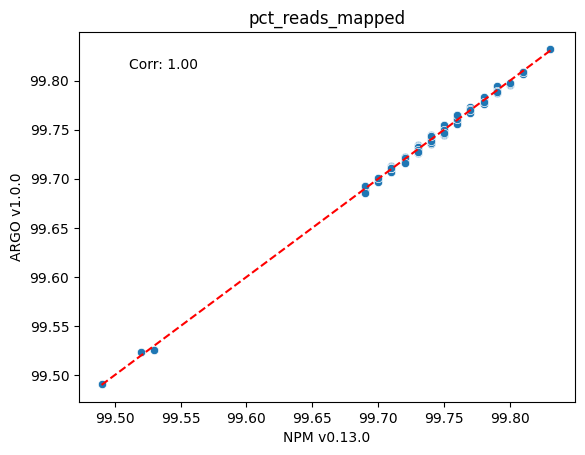

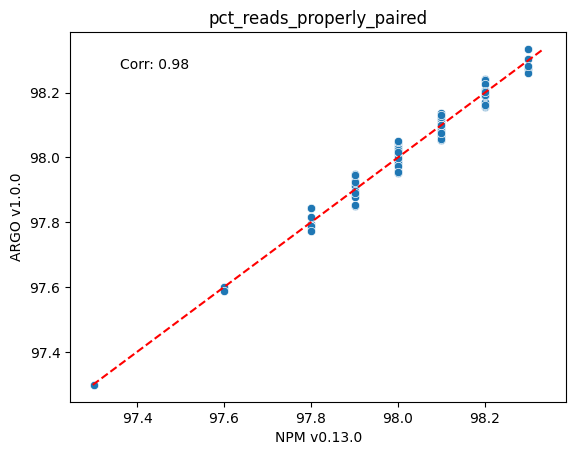

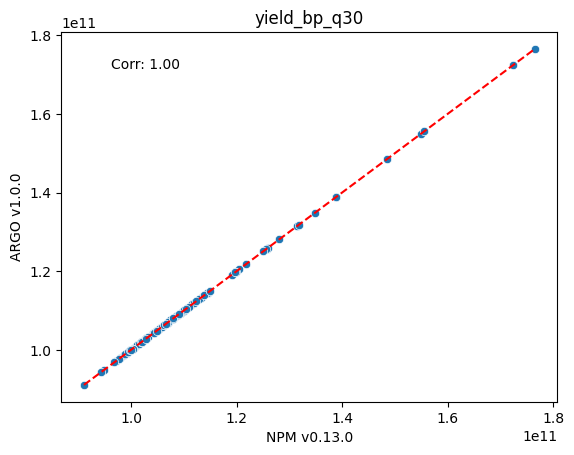

In [51]:
# Plot correlation for each metric
for col in df_A.columns[1:10]:
    scatter(df_A, df_B, col)